In [ ]:
import os

import pandas as pd

from utils import *

In [37]:
DO_FILL_NA = True
SET = "test"

In [38]:
RESULTS_MODEL_FOLDER = "Results_model"
RESULTS_BASELINE_FOLDER = "Results"

In [51]:
csv_files = [f for f in os.listdir(RESULTS_MODEL_FOLDER) if f.endswith(".csv")]
csv_files

['Americas_valperiod_0_testperiod_756_tsteps_1000_tksteps_0_batchsize_32_seqlen_252_transferstrat_global_linear_linear_lr_0.01_indim_200_outdim_200.csv',
 'Americas_valperiod_0_testperiod_756_tsteps_1000_tksteps_0_batchsize_32_seqlen_252_transferstrat_global_linear_lstm_lr_0.01_indim_5_outdim_5_inlay_2_outlay_2_lindim_10dpr0.1.csv',
 'Americas_valperiod_0_testperiod_756_tsteps_1000_tksteps_0_batchsize_32_seqlen_252_transferstrat_global_lstm_linear_lr_0.01_indim_5_outdim_5_inlay_2dpr0.1.csv',
 'Americas_valperiod_0_testperiod_756_tsteps_1000_tksteps_0_batchsize_32_seqlen_252_transferstrat_global_lstm_lstm_lr_0.01_indim_5_outdim_5_inlay_2_outlay_2_odim_10_ltr_2_dpr_0.1_dtr_0.1.csv',
 'Americas_valperiod_0_testperiod_756_tsteps_1000_tksteps_0_batchsize_32_seqlen_252_transferstrat_no_transfer_linear_lr_0.001.csv',
 'Americas_valperiod_0_testperiod_756_tsteps_1000_tksteps_0_batchsize_32_seqlen_252_transferstrat_no_transfer_lstm_lr_0.001_nhi_50_nlayers_2dpr0.1.csv',
 'Americas_valperiod_0_te

In [39]:
def get_results_summary(RESULTS_MODEL_FOLDER, mode="models", set="train"):
    results_summary = pd.DataFrame(
        columns=[
            "region",
            "transferstrat",
            "non_zero_count",
            "valperiod",
            "testperiod",
            "train_steps",
            "tasksteps",
            "median_sharpe_ratio",
            "median_calmar_ratio",
            "median_maximum_draw_down",
            "median_annual_return",
            "median_volatility",
            "median_sortino_ratio",
            "median_down_risk",
            "median_value_at_risk",
            "median_tail_risk",
            "median_skew",
            "median_kurtosis",
        ]
    )
    csv_files = [f for f in os.listdir(RESULTS_MODEL_FOLDER) if f.endswith(".csv")]
    csv_files
    for i in range(len(csv_files)):
        file_name = csv_files[i]
        df = pd.read_csv(f"{RESULTS_MODEL_FOLDER}/{file_name}")
        if DO_FILL_NA:
            df = df.fillna(0)
        else:
            df = df[df["ANN_RET"] != 0]

        # Parse the file name to extract the relevant fields
        text = file_name.split("_")
        region = text[0]
        non_zero_count = len(df)
        valperiod = text[2]
        testperiod = text[4]
        if mode == "models":
            train_steps = text[6]
            tasksteps = text[8]
            transferstrat = (
                f"{train_steps}_{file_name.split('_transferstrat_')[1].split('_lr')[0]}"
            )
        elif mode == "baseline":
            transferstrat = file_name.split("_baseline_")[1].split(".csv")[0]
            train_steps = None
            tasksteps = None
        else:
            raise ValueError(f"Invalid mode: {mode}")
        df_test = df[df["set"] == set]
        average_sharpe_ratio = df_test["SR"].mean()
        average_calmar_ratio = df_test["CR"].mean()
        average_maximum_draw_down = df_test["MDD"].mean()
        average_annual_return = df_test["ANN_RET"].mean()
        average_volatility = df_test["ANN_VOL"].mean()
        average_sortino_ratio = df_test["SortR"].mean()
        average_down_risk = df_test["DownRisk"].mean()
        average_value_at_risk = df_test["VaR"].mean()
        average_tail_risk = df_test["TailR"].mean()
        average_skew = df_test["Skew"].mean()
        average_kurtosis = df_test["Kurt"].mean()

        # Create a pandas Series with the extracted values
        median_meta_series = pd.Series(
            [
                region,
                transferstrat,
                non_zero_count,
                valperiod,
                testperiod,
                train_steps,
                tasksteps,
                median_sharpe_ratio,
                median_calmar_ratio,
                median_maximum_draw_down,
                median_annual_return,
                median_volatility,
                median_sortino_ratio,
                median_down_risk,
                median_value_at_risk,
                median_tail_risk,
                median_skew,
                median_kurtosis,
            ],
            index=[
                "region",
                "transferstrat",
                "non_zero_count",
                "valperiod",
                "testperiod",
                "train_steps",
                "tasksteps",
                "median_sharpe_ratio",
                "median_calmar_ratio",
                "median_maximum_draw_down",
                "median_annual_return",
                "median_volatility",
                "median_sortino_ratio",
                "median_down_risk",
                "median_value_at_risk",
                "median_tail_risk",
                "median_skew",
                "median_kurtosis",
            ],
        )

        # Calculate MAD (Mean Absolute Deviation)
        mad_sharpe_ratio = mad(df_test["SR"])
        mad_calmar_ratio = mad(df_test["CR"])
        mad_maximum_draw_down = mad(df_test["MDD"])
        mad_annual_return = mad(df_test["ANN_RET"])
        mad_volatility = mad(df_test["ANN_VOL"])
        mad_sortino_ratio = mad(df_test["SortR"])
        mad_down_risk = mad(df_test["DownRisk"])
        mad_value_at_risk = mad(df_test["VaR"])
        mad_tail_risk = mad(df_test["TailR"])
        mad_skew = mad(df_test["Skew"])
        mad_kurtosis = mad(df_test["Kurt"])

        # Create a pandas Series with the extracted values
        mad_meta_series = pd.Series(
            [
                region,
                transferstrat,
                non_zero_count,
                valperiod,
                testperiod,
                train_steps,
                tasksteps,
                mad_sharpe_ratio,
                mad_calmar_ratio,
                mad_maximum_draw_down,
                mad_annual_return,
                mad_volatility,
                mad_sortino_ratio,
                mad_down_risk,
                mad_value_at_risk,
                mad_tail_risk,
                mad_skew,
                mad_kurtosis,
            ],
            index=[
                "region",
                "transferstrat",
                "non_zero_count",
                "valperiod",
                "testperiod",
                "train_steps",
                "tasksteps",
                "mad_sharpe_ratio",
                "mad_calmar_ratio",
                "mad_maximum_draw_down",
                "mad_annual_return",
                "mad_volatility",
                "mad_sortino_ratio",
                "mad_down_risk",
                "mad_value_at_risk",
                "mad_tail_risk",
                "mad_skew",
                "mad_kurtosis",
            ],
        )

        # Append the Series as a new row to the results DataFrame
        results_summary = pd.concat(
            [
                results_summary,
                median_meta_series.to_frame().T,
                mad_meta_series.to_frame().T,
            ],
            ignore_index=True,
        )

    return results_summary

In [40]:
def get_results_grouped(results_summary):
    # Convert all columns except 'region' and 'transferstrat' to numeric
    cols_to_convert = [
        col for col in results_summary.columns if col not in ["region", "transferstrat"]
    ]
    cols_to_convert

    results_summary[cols_to_convert] = results_summary[cols_to_convert].apply(
        pd.to_numeric, errors="coerce"
    )
    results_summary_grouped = results_summary.groupby("transferstrat").mean(
        numeric_only=True
    )
    results_summary_grouped = results_summary_grouped.drop(
        columns=["valperiod", "testperiod", "train_steps", "tasksteps"]
    )
    return results_summary_grouped

In [41]:
results_summary_models = get_results_summary(RESULTS_MODEL_FOLDER, set=SET)
results_summary_models

region              transferstrat non_zero_count valperiod testperiod  \
0    Americas  1000_global_linear_linear           3045         0        756   
1    Americas    1000_global_linear_lstm           3045         0        756   
2    Americas    1000_global_lstm_linear           3045         0        756   
3    Americas      1000_global_lstm_lstm           3045         0        756   
4    Americas    1000_no_transfer_linear           3045         0        756   
..        ...                        ...            ...       ...        ...   
151       MEA     500_global_linear_lstm            933         0        756   
152       MEA     500_global_lstm_linear            933         0        756   
153       MEA       500_global_lstm_lstm            933         0        756   
154       MEA     500_no_transfer_linear            933         0        756   
155       MEA       500_no_transfer_lstm            933         0        756   

    train_steps tasksteps average_sharpe_ratio average_calmar_ratio  \
0          1000         0            -0.101629            -0.006249   
1          1000         0             0.217888             0.279788   
2          1000         0               0.2445             0.274472   
3          1000         0              0.17429             0.206376   
4          1000         0            -0.071531             0.116193   
..          ...       ...                  ...                  ...   
151         500         0             0.492639             0.728585   
152         500         0              0.44487             0.681026   
153         500         0              0.16116             0.187699   
154         500         0              0.30084             0.545195   
155         500         0             0.588865             0.840786   

    average_maximum_draw_down average_annual_return average_volatility  \
0                   -0.482689             -0.053714           0.313453   
1                   -0.159673              0.030851            0.10718   
2                   -0.125566              0.024097           0.087012   
3                   -0.192877              0.023766           0.127997   
4                    -0.01219              0.000285           0.006081   
..                        ...                   ...                ...   
151                 -0.132538              0.060151           0.099402   
152                 -0.129458              0.055195           0.091184   
153                 -0.188822              0.018543           0.120504   
154                 -0.010735              0.003212           0.006868   
155                 -0.046656              0.032076           0.037994   

    average_sortino_ratio average_down_risk average_value_at_risk  \
0                -0.09233          0.220728             -0.031768   
1                0.367922           0.07493             -0.010047   
2                0.423623          0.059515             -0.007409   
3                0.293298          0.088051             -0.013297   
4                0.001081          0.004238               -0.0005   
..                    ...               ...                   ...   
151               0.90838          0.065187             -0.008034   
152              0.800996          0.060297             -0.007681   
153              0.281303          0.081923             -0.011702   
154              0.739369           0.00442             -0.000454   
155              1.138466          0.023696             -0.002735   

    average_tail_risk average_skew average_kurtosis  
0            0.985273     0.130796        16.377196  
1            1.051022    -0.196955        23.456196  
2            1.082012     0.108796        30.677008  
3            1.020792     0.317431        16.041915  
4            0.985653    -0.150128        33.338286  
..                ...          ...              ...  
151          1.211832     0.448467        23.790762  
152          1.168529     0.351099        2

In [42]:
results_summary_baseline = get_results_summary(RESULTS_BASELINE_FOLDER, mode="baseline")
results_summary_baseline

region           transferstrat non_zero_count valperiod testperiod  \
0   Americas            buy_and_hold           3045         0        756   
1   Americas            buy_and_hold           3045         0        756   
2   Americas  buy_and_hold_shifted_1           3045         0        756   
3   Americas  buy_and_hold_shifted_1           3045         0        756   
4   Americas                csec_mom           3045         0        756   
..       ...                     ...            ...       ...        ...   
67       MEA                  ts_mom            933         0        756   
68       MEA        ts_mom_shifted_1            933         0        756   
69       MEA        ts_mom_shifted_1            933         0        756   
70       MEA   risk_parity_shifted_1            927       756        756   
71       MEA   risk_parity_shifted_1            927       756        756   

   testperiod train_steps tasksteps average_sharpe_ratio average_calmar_ratio  \
0         756        None      None             0.380018             0.134084   
1         756        None      None             0.380018             0.134084   
2         756        None      None             0.137155             0.050991   
3         756        None      None             0.098739             0.038861   
4         756        None      None             0.381781             0.137069   
5         756        None      None             0.375454             0.133447   
6         756        None      None             0.126216              0.04871   
7         756        None      None              0.08319             0.034456   
8         756        None      None             0.210586             0.123283   
9         756        None      None              0.34537             0.111718   
10        756        None      None              0.34537             0.111718   
11        756        None      None             0.011504             0.018505   
12        756        None      None              0.01029             0.017271   
13        756        None      None             0.351245             0.112297   
14        756        None      None             0.350022             0.111462   
15        756        None      None            -0.017281             0.011751   
16        756        None      None            -0.020609             0.009946   
17        756        None      None             0.190456             0.113713   
18        756        None      None             0.268854             0.092228   
19        756        None      None             0.268854             0.092228   
20        756        None      None            -0.005488             0.020311   
21        756        None      None            -0.028971             0.012511   
22        756        None      None             0.261347             0.094418   
23        756        None      None              0.26197              0.09502   
24        756        None      None            -0.026311             0.016009   
25        756        None      None            -0.048287             0.008403   
26        756        None      None             0.054084             0.039827   
27        756        None      None             0.332897             0.116337   
28        756        None      None             0.332897             0.116337   
29        756        None      None            -0.094189             0.009172   
30        756        None      None            -0.102107               0.0008   
31        756        None      None              0.32033             0.101872   
32        756        None      None              0.32055             0.102114   
33        756        None      None            -0.148531            -0.001682   
34        756        None      None            -0.153225            -0.008232   
35        756        None      None             0.257629             0.147061   

   average_maximum_draw_down average_annual_return average_volatility  \
0                  -0.

In [43]:
results_summary_models_grouped = get_results_grouped(results_summary_models)
results_summary_models_grouped

,non_zero_count,median_sharpe_ratio,median_calmar_ratio,median_maximum_draw_down,median_annual_return,median_volatility,median_sortino_ratio,median_down_risk,median_value_at_risk,median_tail_risk,...,mad_calmar_ratio,mad_maximum_draw_down,mad_annual_return,mad_volatility,mad_sortino_ratio,mad_down_risk,mad_value_at_risk,mad_tail_risk,mad_skew,mad_kurtosis
transferstrat,,,,,,,,,,,,,,,,,,,,,
1000_global_linear_linear,2212.5,0.133717,-0.003770,-0.412460,-0.005703,0.279922,0.197282,0.193624,-0.027860,1.020536,...,0.561414,0.154686,0.169866,0.110427,0.768043,0.071358,0.004217,0.048533,0.910861,20.960140
1000_global_linear_lstm,2212.5,0.326534,0.204017,-0.156122,0.027692,0.113959,0.475406,0.076970,-0.010674,1.111998,...,0.569224,0.073249,0.069974,0.040706,0.830192,0.028413,0.001746,0.082679,1.299998,22.693792
1000_global_lstm_linear,2212.5,0.255744,0.151990,-0.119962,0.017161,0.085092,0.371770,0.057524,-0.007129,1.106759,...,0.586657,0.065678,0.057289,0.036020,0.876910,0.024582,0.001754,0.089945,1.691315,31.669211
1000_global_lstm_lstm,2212.5,0.147494,0.063302,-0.167827,0.005229,0.113644,0.216775,0.077551,-0.011416,1.027672,...,0.406724,0.102423,0.071082,0.065081,0.716584,0.042492,0.002662,0.044483,1.005708,20.760783
1000_no_transfer_linear,2212.5,0.093105,0.062116,-0.008280,0.000386,0.004788,0.141811,0.003238,-0.000393,1.032967,...,0.494823,0.006046,0.003507,0.003147,0.860725,0.002064,0.000141,0.082787,2.190449,37.595666
1000_no_transfer_lstm,2212.5,0.137661,0.071383,-0.109724,0.002698,0.064763,0.199916,0.044801,-0.005533,1.051312,...,0.457963,0.082652,0.043577,0.050545,0.714499,0.035427,0.003912,0.073375,1.406821,25.898575
100_global_linear_linear,2212.5,0.105507,-0.010954,-0.376063,-0.008202,0.248365,0.152422,0.171869,-0.024329,1.020103,...,0.586688,0.152568,0.158516,0.099719,0.815673,0.064828,0.004299,0.054979,0.999320,20.832478
100_global_linear_lstm,2212.5,0.221088,0.120073,-0.201383,0.012483,0.141488,0.325089,0.096100,-0.014356,1.041386,...,0.554335,0.110043,0.090826,0.070294,0.802113,0.045665,0.003148,0.075668,1.169699,22.715117
100_global_lstm_linear,2212.5,0.303546,0.187347,-0.235234,0.029622,0.167133,0.452207,0.112523,-0.016157,1.090989,...,0.625633,0.109725,0.112901,0.071523,0.839078,0.044650,0.002989,0.064199,1.046029,20.160798


In [44]:
results_summary_baseline_grouped = get_results_grouped(
    results_summary=results_summary_baseline
)
results_summary_baseline_grouped

non_zero_count  average_sharpe_ratio  \
transferstrat                                                  
buy_and_hold                  2212.500              0.331785   
buy_and_hold_shifted_1        2212.500              0.331785   
csec_mom                      2212.500              0.012245   
csec_mom_shifted_1            2212.500             -0.005512   
risk_parity                   2212.500              0.328676   
risk_parity_shifted_1         2205.375              0.252594   
ts_mom                        2212.500             -0.016477   
ts_mom_shifted_1              2212.500             -0.034733   

                        median_calmar_ratio  median_maximum_draw_down  \
transferstrat                                                           
buy_and_hold                       0.114672                 -0.008090   
buy_and_hold_shifted_1             0.114672                 -0.008090   
csec_mom                           0.067837                 -0.011514   
csec_mom_shifted_1                 0.066042                 -0.011378   
risk_parity                        0.121219                 -0.007470   
risk_parity_shifted_1              0.129079                 -0.182207   
ts_mom                             0.070834                 -0.010516   
ts_mom_shifted_1                   0.062620                 -0.010653   

                        median_annual_return  median_volatility  \
transferstrat                                                     
buy_and_hold                        0.000968           0.005296   
buy_and_hold_shifted_1              0.000968           0.005296   
csec_mom                            0.000413           0.006969   
csec_mom_shifted_1                  0.000331           0.006941   
risk_parity                         0.000959           0.005141   
risk_parity_shifted_1               0.023694           0.136686   
ts_mom                              0.000372           0.006090   
ts_mom_shifted_1                    0.000306           0.006096   

                        median_sortino_ratio  median_down_risk  \
transferstrat                                                    
buy_and_hold                        0.263501          0.003574   
buy_and_hold_shifted_1              0.263501          0.003574   
csec_mom                            0.177557          0.004634   
csec_mom_shifted_1                  0.172247          0.004613   
risk_parity                         0.277423          0.003494   
risk_parity_shifted_1               0.359763          0.093094   
ts_mom                              0.182053          0.004113   
ts_mom_shifted_1                    0.155158          0.004066   

                        median_value_at_risk  median_tail_risk  ...  \
transferstrat                                                   ...   
buy_and_hold                       -0.000481          1.025035  ...   
buy_and_hold_shifted_1             -0.000481          1.025035  ...   
csec_mom                           -0.000683          1.011165  ...   
csec_mom_shifted_1                 -0.000686          1.003262  ...   
risk_parity                        -0.000436          1.047438  ...   
risk_parity_shifted_1              -0.012539          1.054071  ...   
ts_mom                             -0.000589          1.006851  ...   
ts_mom_shifted_1                   -0.000592          1.004406  ...   

                        mad_calmar_ratio  mad_maximum_draw_down  \
transferstrat                                                     
buy_and_hold                    0.381749               0.009528   
buy_and_hold_shifted_1          0.381749               0.009528   
csec_mom                        0.347669               0.024686   
csec_mom_shifted_1              0.331888               0.024424   
risk_parity                     0.393940               0.009420   
risk_parity_shifted_1           0.398257               0.059617   
ts_mom                          0.339462               0.021269   
ts_mom

In [45]:
results_grouped = pd.concat(
    [results_summary_models_grouped, results_summary_baseline_grouped]
)
results_grouped

,non_zero_count,median_sharpe_ratio,median_calmar_ratio,median_maximum_draw_down,median_annual_return,median_volatility,median_sortino_ratio,median_down_risk,median_value_at_risk,median_tail_risk,...,mad_calmar_ratio,mad_maximum_draw_down,mad_annual_return,mad_volatility,mad_sortino_ratio,mad_down_risk,mad_value_at_risk,mad_tail_risk,mad_skew,mad_kurtosis
transferstrat,,,,,,,,,,,,,,,,,,,,,
1000_global_linear_linear,2212.500,0.133717,-0.003770,-0.412460,-0.005703,0.279922,0.197282,0.193624,-0.027860,1.020536,...,0.561414,0.154686,0.169866,0.110427,0.768043,0.071358,0.004217,0.048533,0.910861,20.960140
1000_global_linear_lstm,2212.500,0.326534,0.204017,-0.156122,0.027692,0.113959,0.475406,0.076970,-0.010674,1.111998,...,0.569224,0.073249,0.069974,0.040706,0.830192,0.028413,0.001746,0.082679,1.299998,22.693792
1000_global_lstm_linear,2212.500,0.255744,0.151990,-0.119962,0.017161,0.085092,0.371770,0.057524,-0.007129,1.106759,...,0.586657,0.065678,0.057289,0.036020,0.876910,0.024582,0.001754,0.089945,1.691315,31.669211
1000_global_lstm_lstm,2212.500,0.147494,0.063302,-0.167827,0.005229,0.113644,0.216775,0.077551,-0.011416,1.027672,...,0.406724,0.102423,0.071082,0.065081,0.716584,0.042492,0.002662,0.044483,1.005708,20.760783
1000_no_transfer_linear,2212.500,0.093105,0.062116,-0.008280,0.000386,0.004788,0.141811,0.003238,-0.000393,1.032967,...,0.494823,0.006046,0.003507,0.003147,0.860725,0.002064,0.000141,0.082787,2.190449,37.595666
1000_no_transfer_lstm,2212.500,0.137661,0.071383,-0.109724,0.002698,0.064763,0.199916,0.044801,-0.005533,1.051312,...,0.457963,0.082652,0.043577,0.050545,0.714499,0.035427,0.003912,0.073375,1.406821,25.898575
100_global_linear_linear,2212.500,0.105507,-0.010954,-0.376063,-0.008202,0.248365,0.152422,0.171869,-0.024329,1.020103,...,0.586688,0.152568,0.158516,0.099719,0.815673,0.064828,0.004299,0.054979,0.999320,20.832478
100_global_linear_lstm,2212.500,0.221088,0.120073,-0.201383,0.012483,0.141488,0.325089,0.096100,-0.014356,1.041386,...,0.554335,0.110043,0.090826,0.070294,0.802113,0.045665,0.003148,0.075668,1.169699,22.715117
100_global_lstm_linear,2212.500,0.303546,0.187347,-0.235234,0.029622,0.167133,0.452207,0.112523,-0.016157,1.090989,...,0.625633,0.109725,0.112901,0.071523,0.839078,0.044650,0.002989,0.064199,1.046029,20.160798


# Averages

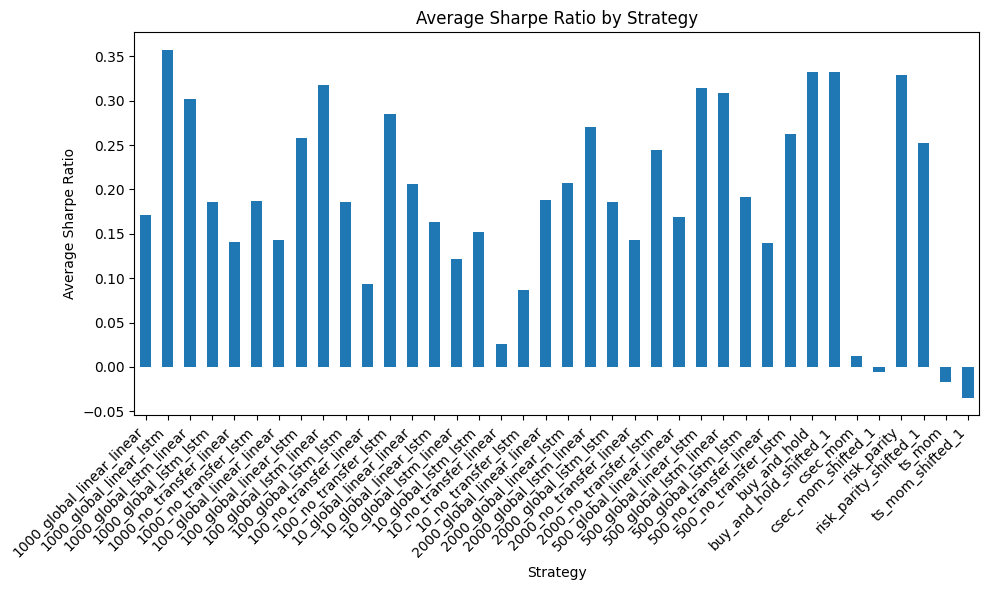

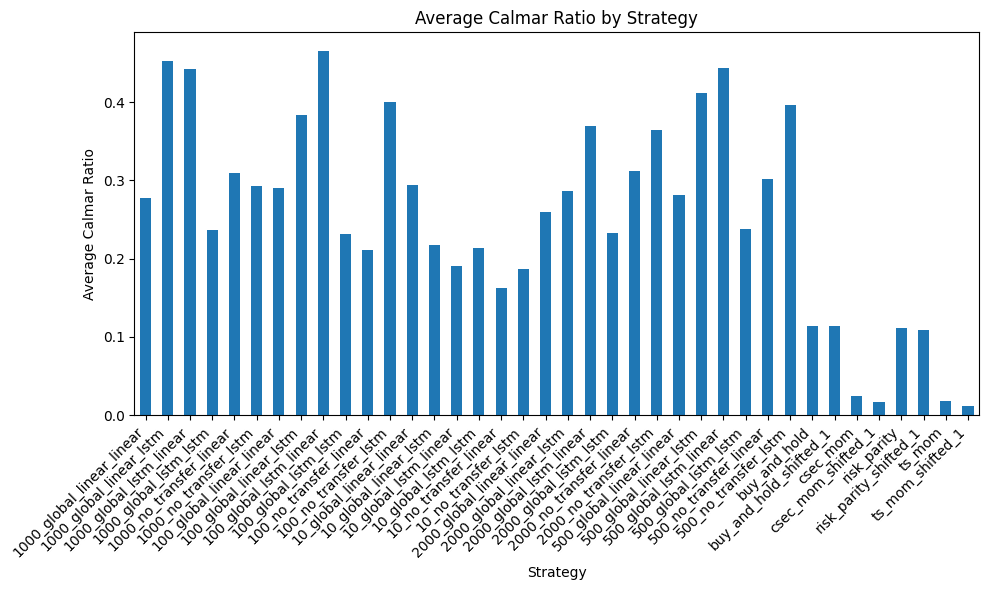

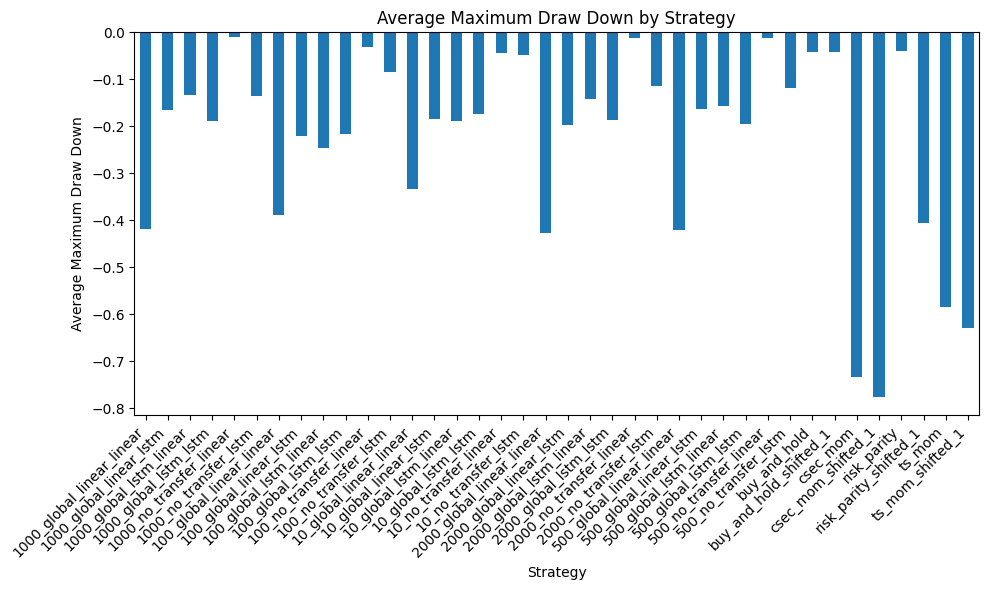

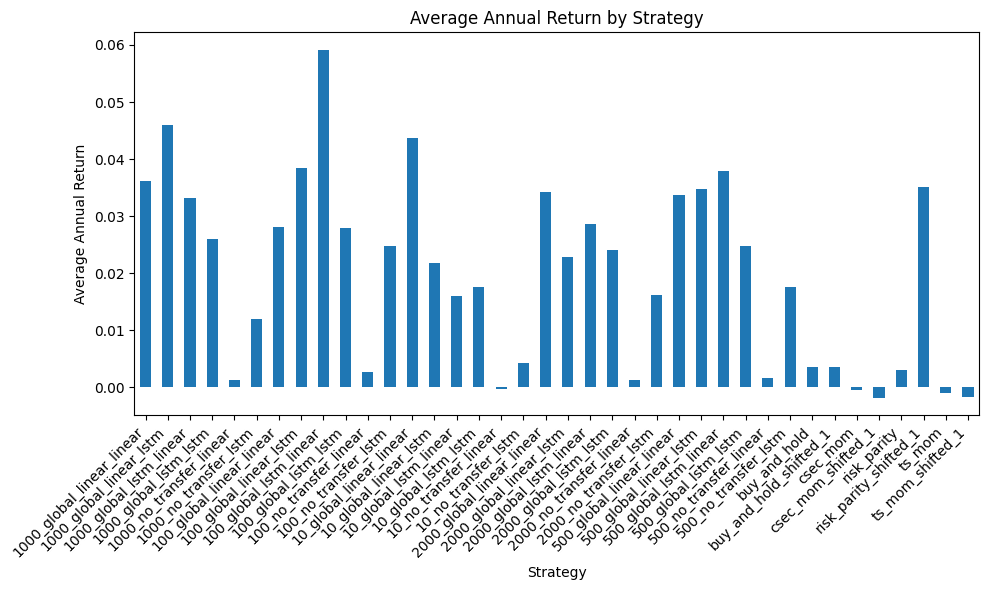

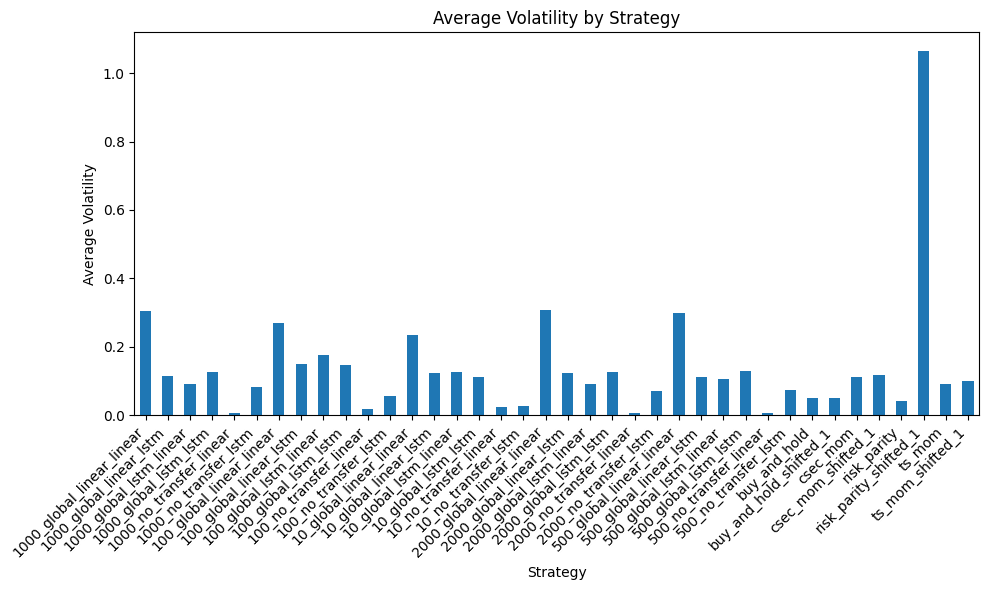

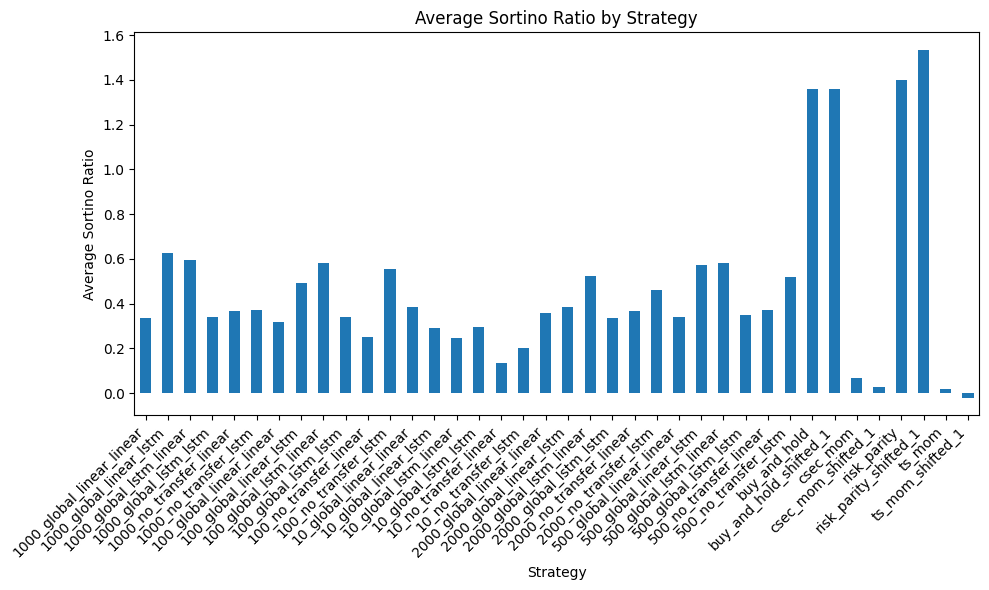

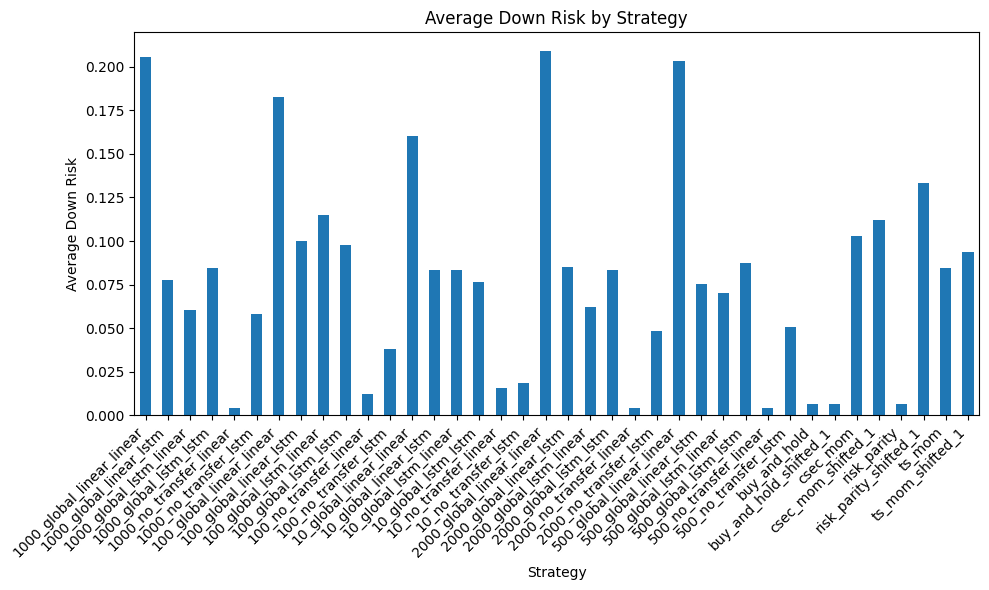

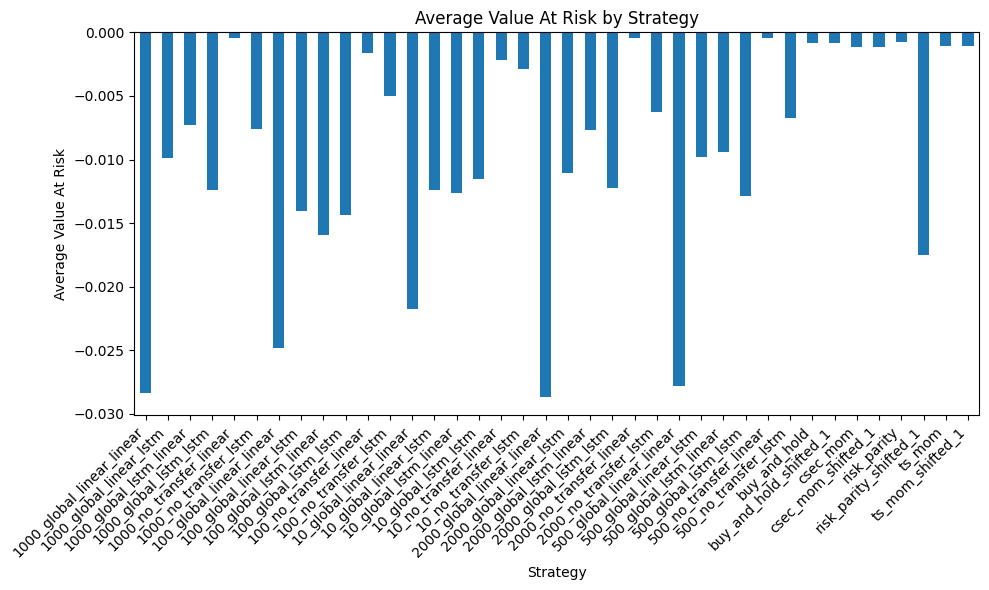

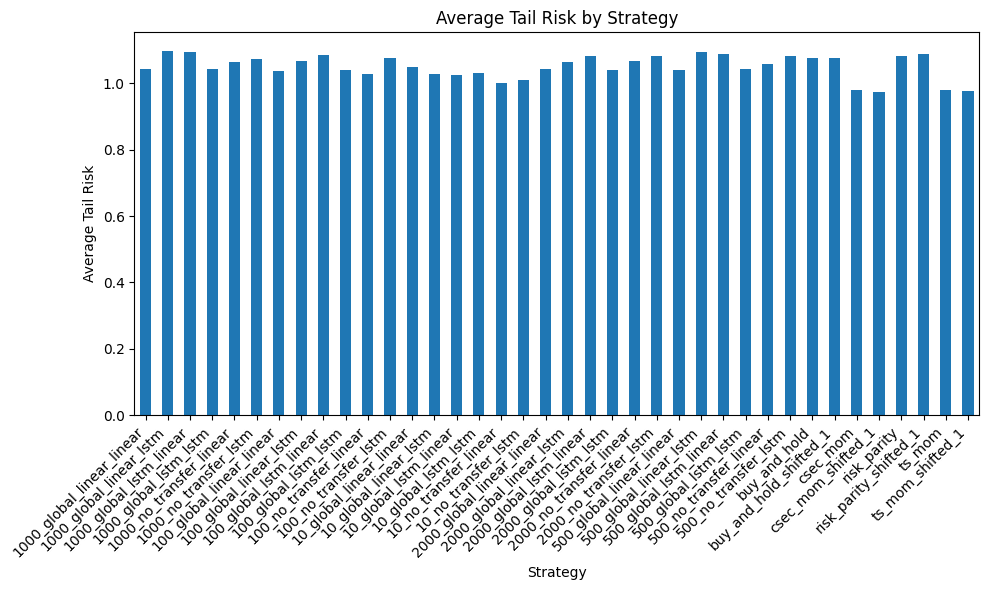

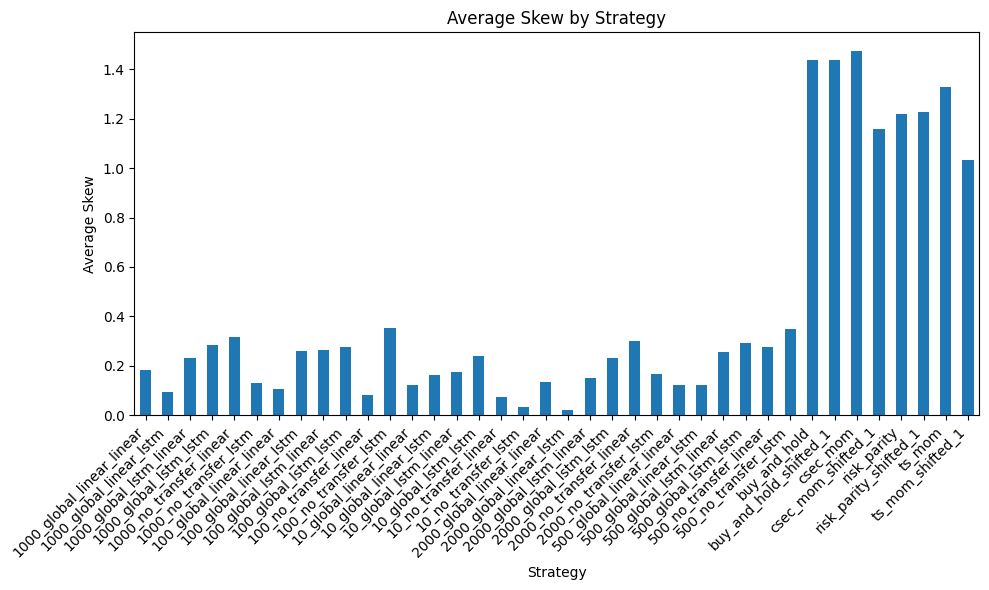

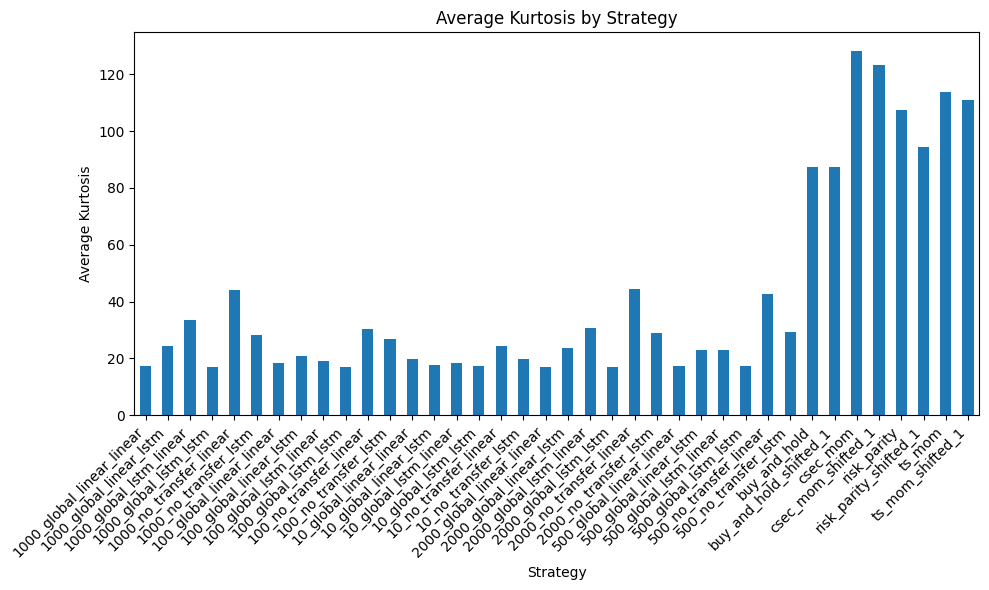

In [46]:
import matplotlib.pyplot as plt

metrics = [
    "median_sharpe_ratio",
    "median_calmar_ratio",
    "median_maximum_draw_down",
    "median_annual_return",
    "median_volatility",
    "median_sortino_ratio",
    "median_down_risk",
    "median_value_at_risk",
    "median_tail_risk",
    "median_skew",
    "median_kurtosis",
]

for metric in metrics:
    plt.figure(figsize=(10, 6))
    results_grouped[metric].plot(kind="bar")
    plt.title(f"{metric.replace('_', ' ').title()} by Strategy")
    plt.ylabel(metric.replace("_", " ").title())
    plt.xlabel("Strategy")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Ranking

In [47]:
results_grouped_rank = results_grouped.copy()
positive_rank_metrics = [
    "median_sharpe_ratio",
    "median_calmar_ratio",
    "median_annual_return",
    "median_sortino_ratio",
]

for metric in positive_rank_metrics:
    results_grouped_rank[metric] = results_grouped_rank[metric].rank(
        ascending=False, method="min"
    )

negative_rank_metrics = [
    "median_maximum_draw_down",
    "median_volatility",
    "median_down_risk",
    "median_value_at_risk",
    "median_tail_risk",
]

rank_metrics = positive_rank_metrics + negative_rank_metrics
for metric in negative_rank_metrics:
    results_grouped_rank[metric] = results_grouped_rank[metric].rank(
        ascending=True, method="min"
    )

results_grouped_rank = results_grouped_rank[rank_metrics]
results_grouped_rank

,median_sharpe_ratio,median_calmar_ratio,median_annual_return,median_sortino_ratio,median_maximum_draw_down,median_volatility,median_down_risk,median_value_at_risk,median_tail_risk
transferstrat,,,,,,,,,
1000_global_linear_linear,23.0,19.0,6.0,27.0,7.0,36.0,37.0,2.0,16.0
1000_global_linear_lstm,1.0,1.0,2.0,5.0,21.0,22.0,19.0,17.0,38.0
1000_global_lstm_linear,8.0,4.0,11.0,6.0,26.0,14.0,14.0,22.0,36.0
1000_global_lstm_lstm,20.0,22.0,15.0,24.0,17.0,27.0,23.0,13.0,17.0
1000_no_transfer_linear,29.0,12.0,33.0,20.0,38.0,1.0,1.0,38.0,22.0
1000_no_transfer_lstm,19.0,15.0,25.0,18.0,25.0,13.0,13.0,21.0,25.0
100_global_linear_linear,27.0,16.0,13.0,28.0,9.0,34.0,35.0,4.0,11.0
100_global_linear_lstm,12.0,8.0,4.0,13.0,12.0,31.0,29.0,9.0,24.0
100_global_lstm_linear,5.0,1.0,1.0,7.0,11.0,32.0,32.0,7.0,33.0


In [48]:
results_grouped_rank_total = results_grouped_rank.sum(axis=1)
results_grouped_rank_total

transferstrat
1000_global_linear_linear    173.0
1000_global_linear_lstm      127.0
1000_global_lstm_linear      141.0
1000_global_lstm_lstm        178.0
1000_no_transfer_linear      194.0
1000_no_transfer_lstm        174.0
100_global_linear_linear     177.0
100_global_linear_lstm       142.0
100_global_lstm_linear       129.0
100_global_lstm_lstm         176.0
100_no_transfer_linear       202.0
100_no_transfer_lstm         141.0
10_global_linear_linear      150.0
10_global_linear_lstm        184.0
10_global_lstm_linear        198.0
10_global_lstm_lstm          186.0
10_no_transfer_linear        208.0
10_no_transfer_lstm          198.0
2000_global_linear_linear    167.0
2000_global_linear_lstm      167.0
2000_global_lstm_linear      149.0
2000_global_lstm_lstm        181.0
2000_no_transfer_linear      191.0
2000_no_transfer_lstm        164.0
500_global_linear_linear     169.0
500_global_linear_lstm       142.0
500_global_lstm_linear       134.0
500_global_lstm_lstm         172.0
500_no

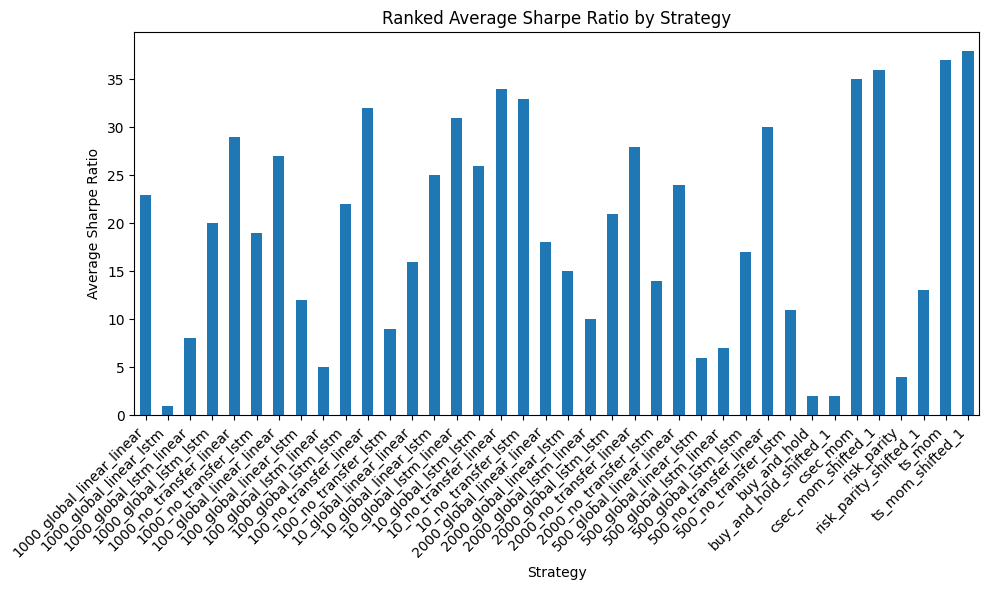

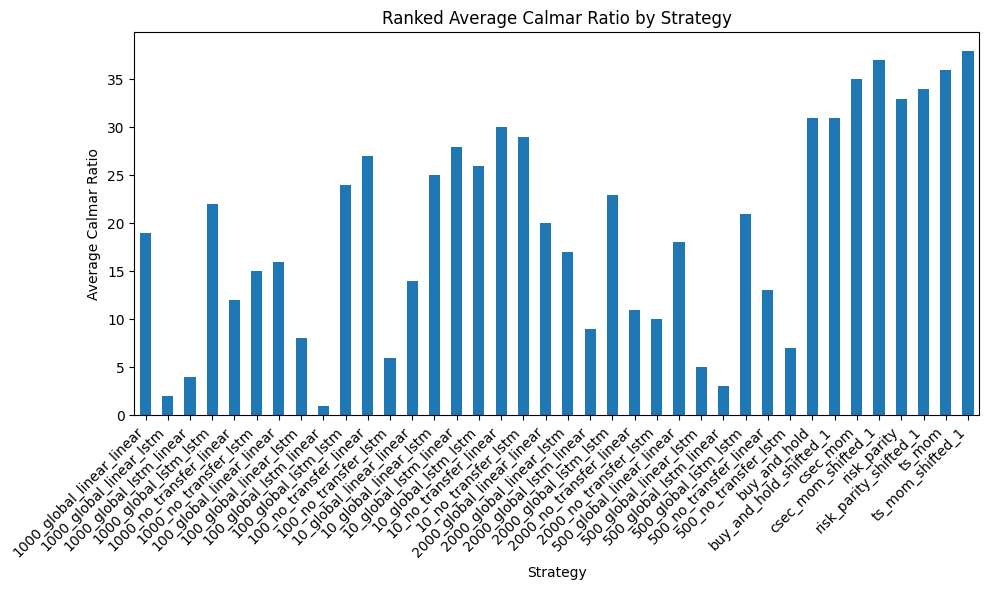

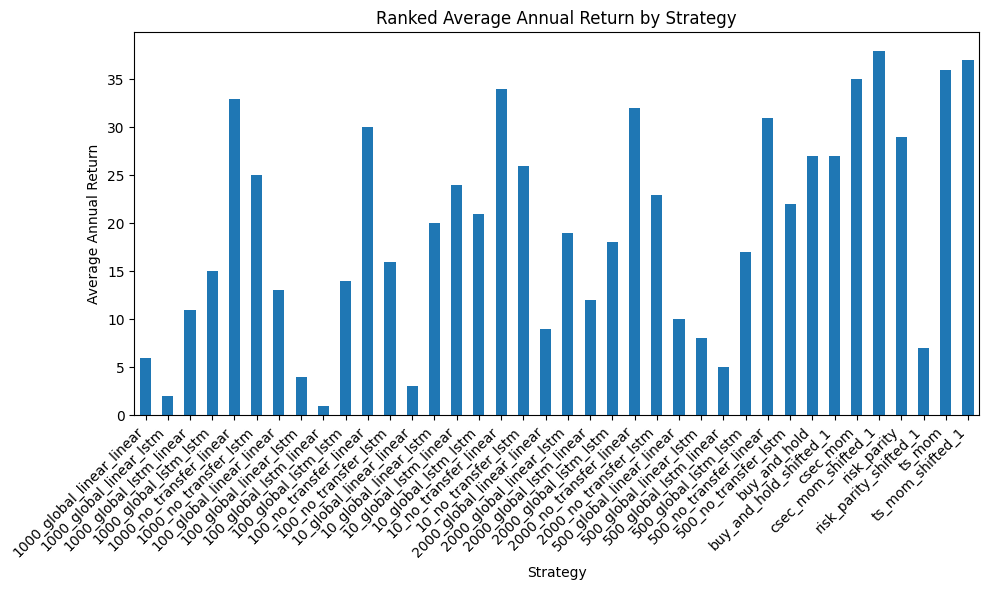

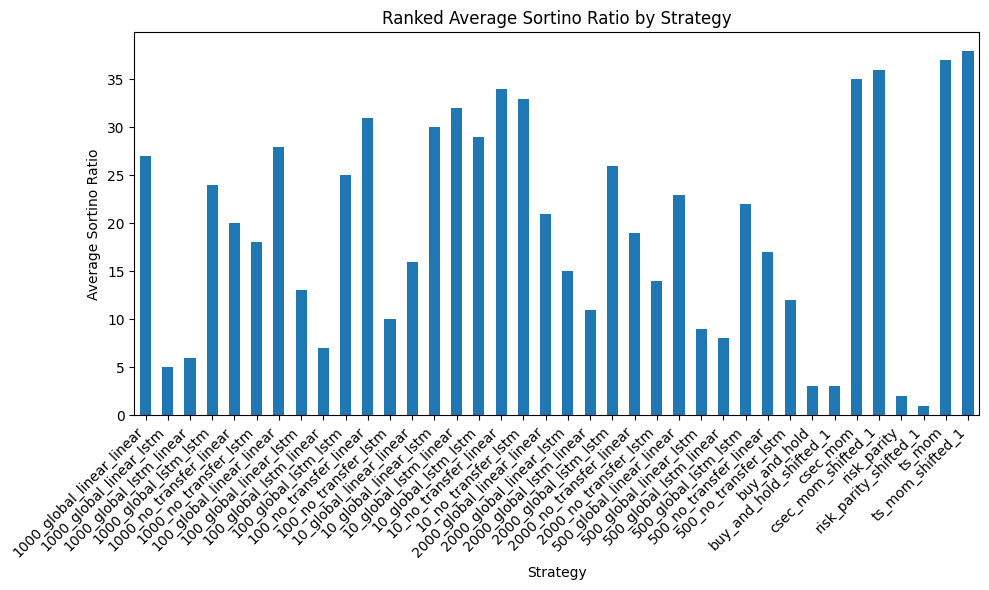

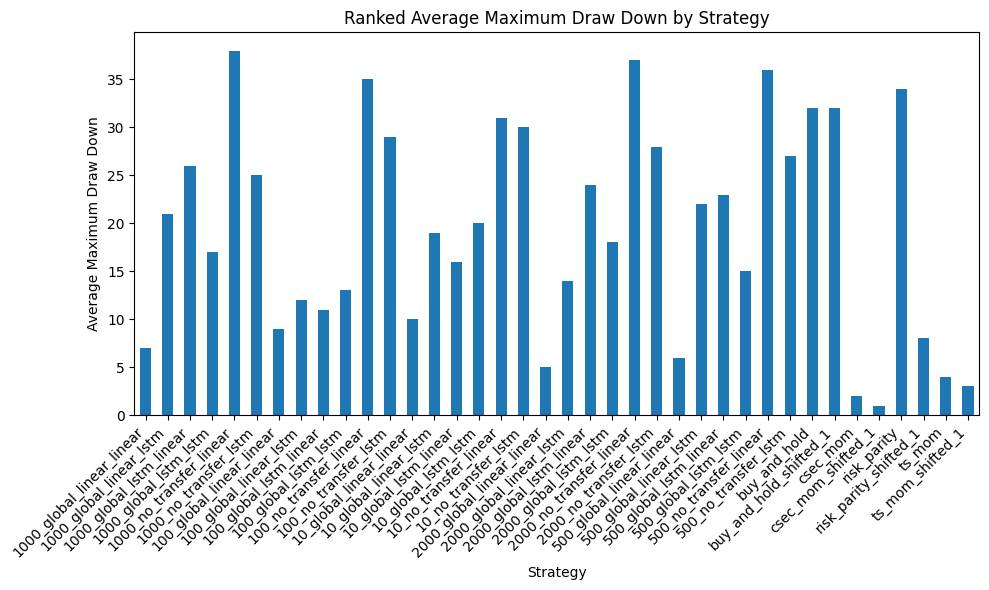

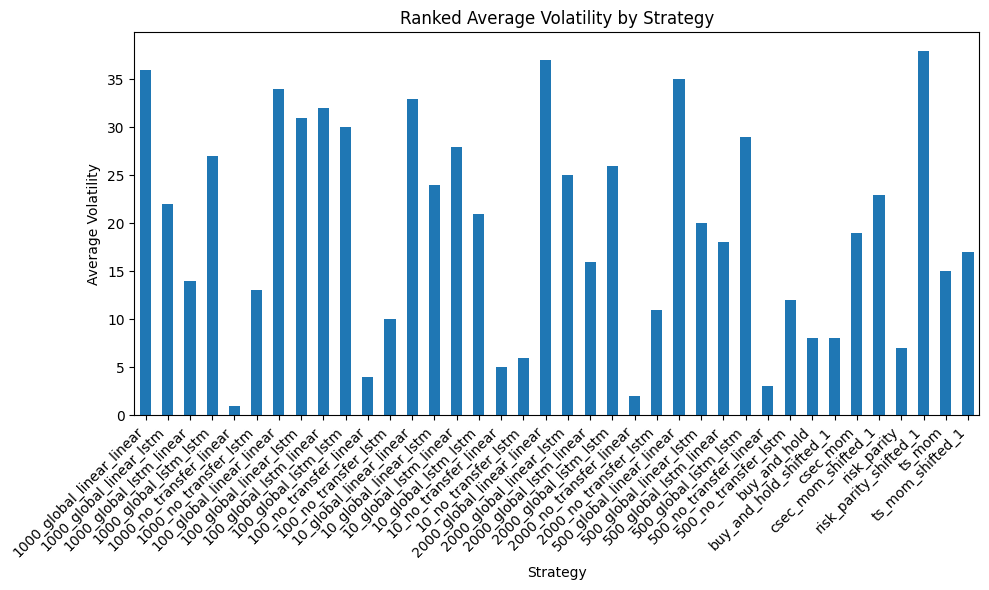

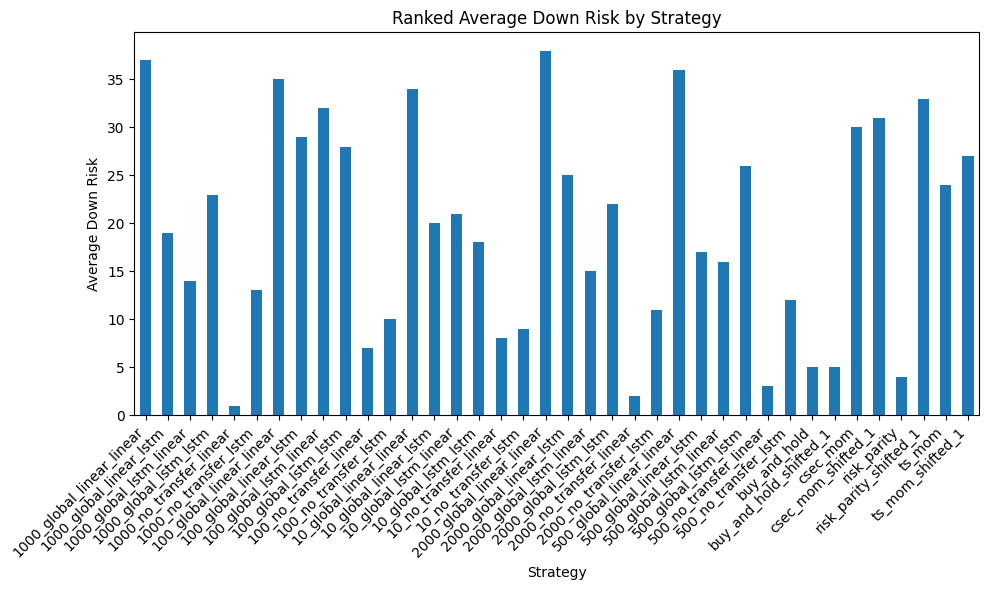

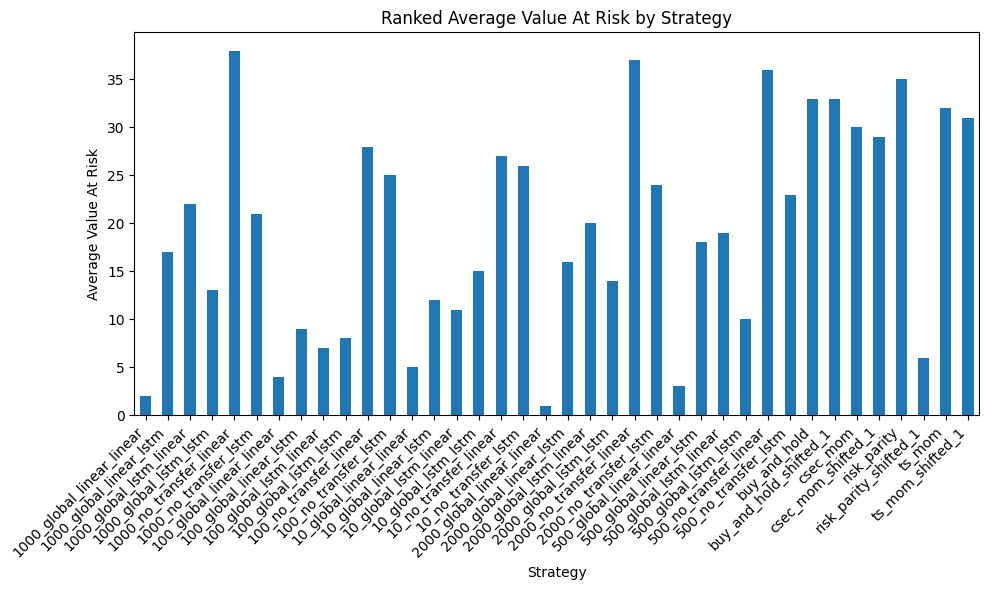

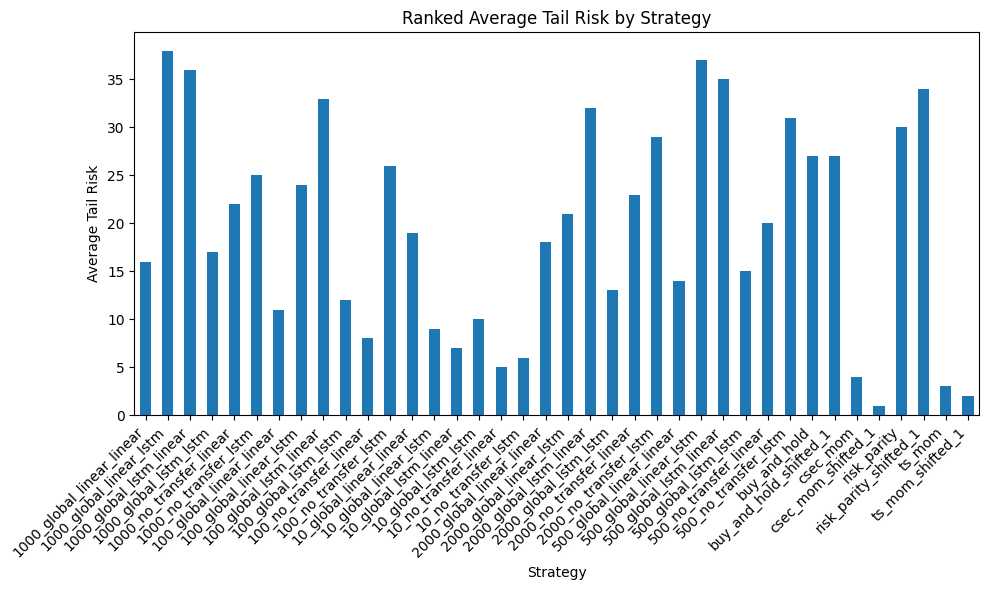

In [49]:
for metric in rank_metrics:
    plt.figure(figsize=(10, 6))
    results_grouped_rank[metric].plot(kind="bar")
    plt.title(f"Ranked {metric.replace('_', ' ').title()} by Strategy")
    plt.ylabel(metric.replace("_", " ").title())
    plt.xlabel("Strategy")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Total ranking

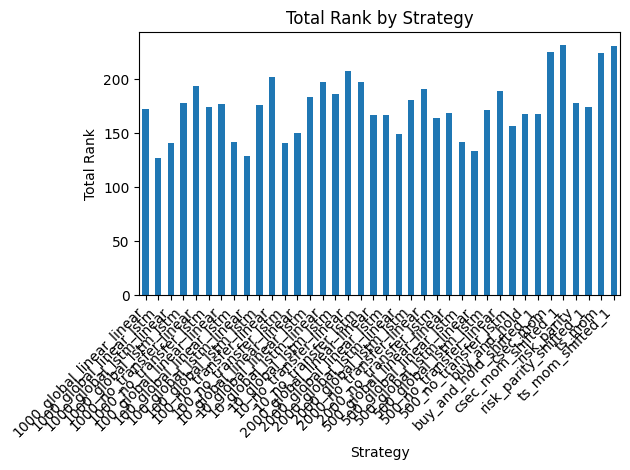

In [50]:
results_grouped_rank_total.plot(kind="bar")
plt.title("Total Rank by Strategy")
plt.ylabel("Total Rank")
plt.xlabel("Strategy")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [17]:
results_summary_baseline_grouped

,non_zero_count,median_sharpe_ratio,median_calmar_ratio,median_maximum_draw_down,median_annual_return,median_volatility,median_sortino_ratio,median_down_risk,median_value_at_risk,median_tail_risk,...,mad_calmar_ratio,mad_maximum_draw_down,mad_annual_return,mad_volatility,mad_sortino_ratio,mad_down_risk,mad_value_at_risk,mad_tail_risk,mad_skew,mad_kurtosis
transferstrat,,,,,,,,,,,,,,,,,,,,,
buy_and_hold,2212.500,0.175814,0.114672,-0.008090,0.000968,0.005296,0.263501,0.003574,-0.000481,1.025035,...,0.381749,0.009528,0.004662,0.005852,0.713378,0.003772,0.000435,0.048074,0.998366,20.401205
buy_and_hold_shifted_1,2212.500,0.175814,0.114672,-0.008090,0.000968,0.005296,0.263501,0.003574,-0.000481,1.025035,...,0.381749,0.009528,0.004662,0.005852,0.713378,0.003772,0.000435,0.048074,0.998366,20.401205
csec_mom,2212.500,0.111975,0.067837,-0.011514,0.000413,0.006969,0.177557,0.004634,-0.000683,1.011165,...,0.347669,0.024686,0.006882,0.012296,0.703739,0.007996,0.000656,0.040403,1.688158,29.793738
csec_mom_shifted_1,2212.500,0.106569,0.066042,-0.011378,0.000331,0.006941,0.172247,0.004613,-0.000686,1.003262,...,0.331888,0.024424,0.006436,0.012166,0.678762,0.007853,0.000660,0.039993,1.674302,28.952774
risk_parity,2212.500,0.188464,0.121219,-0.007470,0.000959,0.005141,0.277423,0.003494,-0.000436,1.047438,...,0.393940,0.009420,0.004542,0.005275,0.721400,0.003675,0.000433,0.056269,1.217340,25.813705
risk_parity_shifted_1,2205.375,0.179810,0.129079,-0.182207,0.023694,0.136686,0.359763,0.093094,-0.012539,1.054071,...,0.398257,0.059617,0.063414,0.028014,0.687595,0.018444,0.002335,0.046201,1.083143,19.671715
ts_mom,2212.500,0.116319,0.070834,-0.010516,0.000372,0.006090,0.182053,0.004113,-0.000589,1.006851,...,0.339462,0.021269,0.006065,0.010518,0.684502,0.006813,0.000570,0.038368,1.390254,24.310985
ts_mom_shifted_1,2212.500,0.100525,0.062620,-0.010653,0.000306,0.006096,0.155158,0.004066,-0.000592,1.004406,...,0.319148,0.021077,0.005691,0.010413,0.661112,0.006671,0.000572,0.037005,1.371931,23.735569


In [18]:
results_summary_models_grouped

,non_zero_count,median_sharpe_ratio,median_calmar_ratio,median_maximum_draw_down,median_annual_return,median_volatility,median_sortino_ratio,median_down_risk,median_value_at_risk,median_tail_risk,...,mad_calmar_ratio,mad_maximum_draw_down,mad_annual_return,mad_volatility,mad_sortino_ratio,mad_down_risk,mad_value_at_risk,mad_tail_risk,mad_skew,mad_kurtosis
transferstrat,,,,,,,,,,,,,,,,,,,,,
1000_global_linear_linear,2212.5,0.133717,-0.003770,-0.412460,-0.005703,0.279922,0.197282,0.193624,-0.027860,1.020536,...,0.561414,0.154686,0.169866,0.110427,0.768043,0.071358,0.004217,0.048533,0.910861,20.960140
1000_global_linear_lstm,2212.5,0.326534,0.204017,-0.156122,0.027692,0.113959,0.475406,0.076970,-0.010674,1.111998,...,0.569224,0.073249,0.069974,0.040706,0.830192,0.028413,0.001746,0.082679,1.299998,22.693792
1000_global_lstm_linear,2212.5,0.255744,0.151990,-0.119962,0.017161,0.085092,0.371770,0.057524,-0.007129,1.106759,...,0.586657,0.065678,0.057289,0.036020,0.876910,0.024582,0.001754,0.089945,1.691315,31.669211
1000_global_lstm_lstm,2212.5,0.147494,0.063302,-0.167827,0.005229,0.113644,0.216775,0.077551,-0.011416,1.027672,...,0.406724,0.102423,0.071082,0.065081,0.716584,0.042492,0.002662,0.044483,1.005708,20.760783
1000_no_transfer_linear,2212.5,0.093105,0.062116,-0.008280,0.000386,0.004788,0.141811,0.003238,-0.000393,1.032967,...,0.494823,0.006046,0.003507,0.003147,0.860725,0.002064,0.000141,0.082787,2.190449,37.595666
1000_no_transfer_lstm,2212.5,0.137661,0.071383,-0.109724,0.002698,0.064763,0.199916,0.044801,-0.005533,1.051312,...,0.457963,0.082652,0.043577,0.050545,0.714499,0.035427,0.003912,0.073375,1.406821,25.898575
100_global_linear_linear,2212.5,0.105507,-0.010954,-0.376063,-0.008202,0.248365,0.152422,0.171869,-0.024329,1.020103,...,0.586688,0.152568,0.158516,0.099719,0.815673,0.064828,0.004299,0.054979,0.999320,20.832478
100_global_linear_lstm,2212.5,0.221088,0.120073,-0.201383,0.012483,0.141488,0.325089,0.096100,-0.014356,1.041386,...,0.554335,0.110043,0.090826,0.070294,0.802113,0.045665,0.003148,0.075668,1.169699,22.715117
100_global_lstm_linear,2212.5,0.303546,0.187347,-0.235234,0.029622,0.167133,0.452207,0.112523,-0.016157,1.090989,...,0.625633,0.109725,0.112901,0.071523,0.839078,0.044650,0.002989,0.064199,1.046029,20.160798


In [19]:
results_summary_models_grouped.loc[
    ["1000_global_lstm_lstm", "1000_no_transfer_linear", "1000_no_transfer_lstm"]
]

,non_zero_count,median_sharpe_ratio,median_calmar_ratio,median_maximum_draw_down,median_annual_return,median_volatility,median_sortino_ratio,median_down_risk,median_value_at_risk,median_tail_risk,...,mad_calmar_ratio,mad_maximum_draw_down,mad_annual_return,mad_volatility,mad_sortino_ratio,mad_down_risk,mad_value_at_risk,mad_tail_risk,mad_skew,mad_kurtosis
transferstrat,,,,,,,,,,,,,,,,,,,,,
1000_global_lstm_lstm,2212.5,0.147494,0.063302,-0.167827,0.005229,0.113644,0.216775,0.077551,-0.011416,1.027672,...,0.406724,0.102423,0.071082,0.065081,0.716584,0.042492,0.002662,0.044483,1.005708,20.760783
1000_no_transfer_linear,2212.5,0.093105,0.062116,-0.008280,0.000386,0.004788,0.141811,0.003238,-0.000393,1.032967,...,0.494823,0.006046,0.003507,0.003147,0.860725,0.002064,0.000141,0.082787,2.190449,37.595666
1000_no_transfer_lstm,2212.5,0.137661,0.071383,-0.109724,0.002698,0.064763,0.199916,0.044801,-0.005533,1.051312,...,0.457963,0.082652,0.043577,0.050545,0.714499,0.035427,0.003912,0.073375,1.406821,25.898575


In [20]:
def get_table_1(results_summary_baseline_grouped, results_summary_models_grouped):
    cleaned_results_summary_baseline_grouped = results_summary_baseline_grouped[
        ~results_summary_baseline_grouped.index.astype(str).str.endswith("shifted_1")
    ]
    cleaned_results_summary_baseline_grouped = (
        cleaned_results_summary_baseline_grouped.drop(columns=["non_zero_count"])
    )

    cleaned_results_summary_models_grouped = results_summary_models_grouped.loc[
        ["1000_global_lstm_lstm", "1000_no_transfer_linear", "1000_no_transfer_lstm"]
    ]

    output_df = pd.concat(
        [
            cleaned_results_summary_baseline_grouped,
            cleaned_results_summary_models_grouped,
        ]
    )
    output_df = output_df.rename(
        index={
            "buy_and_hold": "Buy and hold",
            "risk_parity": "Risk_parity",
            "ts_mom": "TS Mom",
            "csec_mom": "CS Mom",
            "1000_no_transfer_linear": "No Transfer Linear",
            "1000_no_transfer_lstm": "No Transfer LSTM",
            "1000_global_lstm_lstm": "QuantNet",
        }
    )

    return output_df

In [21]:
table_1 = get_table_1(results_summary_baseline_grouped, results_summary_models_grouped)
table_1

,median_sharpe_ratio,median_calmar_ratio,median_maximum_draw_down,median_annual_return,median_volatility,median_sortino_ratio,median_down_risk,median_value_at_risk,median_tail_risk,median_skew,...,mad_maximum_draw_down,mad_annual_return,mad_volatility,mad_sortino_ratio,mad_down_risk,mad_value_at_risk,mad_tail_risk,mad_skew,mad_kurtosis,non_zero_count
transferstrat,,,,,,,,,,,,,,,,,,,,,
Buy and hold,0.175814,0.114672,-0.008090,0.000968,0.005296,0.263501,0.003574,-0.000481,1.025035,0.136432,...,0.009528,0.004662,0.005852,0.713378,0.003772,0.000435,0.048074,0.998366,20.401205,NaN
CS Mom,0.111975,0.067837,-0.011514,0.000413,0.006969,0.177557,0.004634,-0.000683,1.011165,0.433594,...,0.024686,0.006882,0.012296,0.703739,0.007996,0.000656,0.040403,1.688158,29.793738,NaN
Risk_parity,0.188464,0.121219,-0.007470,0.000959,0.005141,0.277423,0.003494,-0.000436,1.047438,0.138006,...,0.009420,0.004542,0.005275,0.721400,0.003675,0.000433,0.056269,1.217340,25.813705,NaN
TS Mom,0.116319,0.070834,-0.010516,0.000372,0.006090,0.182053,0.004113,-0.000589,1.006851,0.368555,...,0.021269,0.006065,0.010518,0.684502,0.006813,0.000570,0.038368,1.390254,24.310985,NaN
QuantNet,0.147494,0.063302,-0.167827,0.005229,0.113644,0.216775,0.077551,-0.011416,1.027672,0.132192,...,0.102423,0.071082,0.065081,0.716584,0.042492,0.002662,0.044483,1.005708,20.760783,2212.5
No Transfer Linear,0.093105,0.062116,-0.008280,0.000386,0.004788,0.141811,0.003238,-0.000393,1.032967,0.240033,...,0.006046,0.003507,0.003147,0.860725,0.002064,0.000141,0.082787,2.190449,37.595666,2212.5
No Transfer LSTM,0.137661,0.071383,-0.109724,0.002698,0.064763,0.199916,0.044801,-0.005533,1.051312,0.056026,...,0.082652,0.043577,0.050545,0.714499,0.035427,0.003912,0.073375,1.406821,25.898575,2212.5


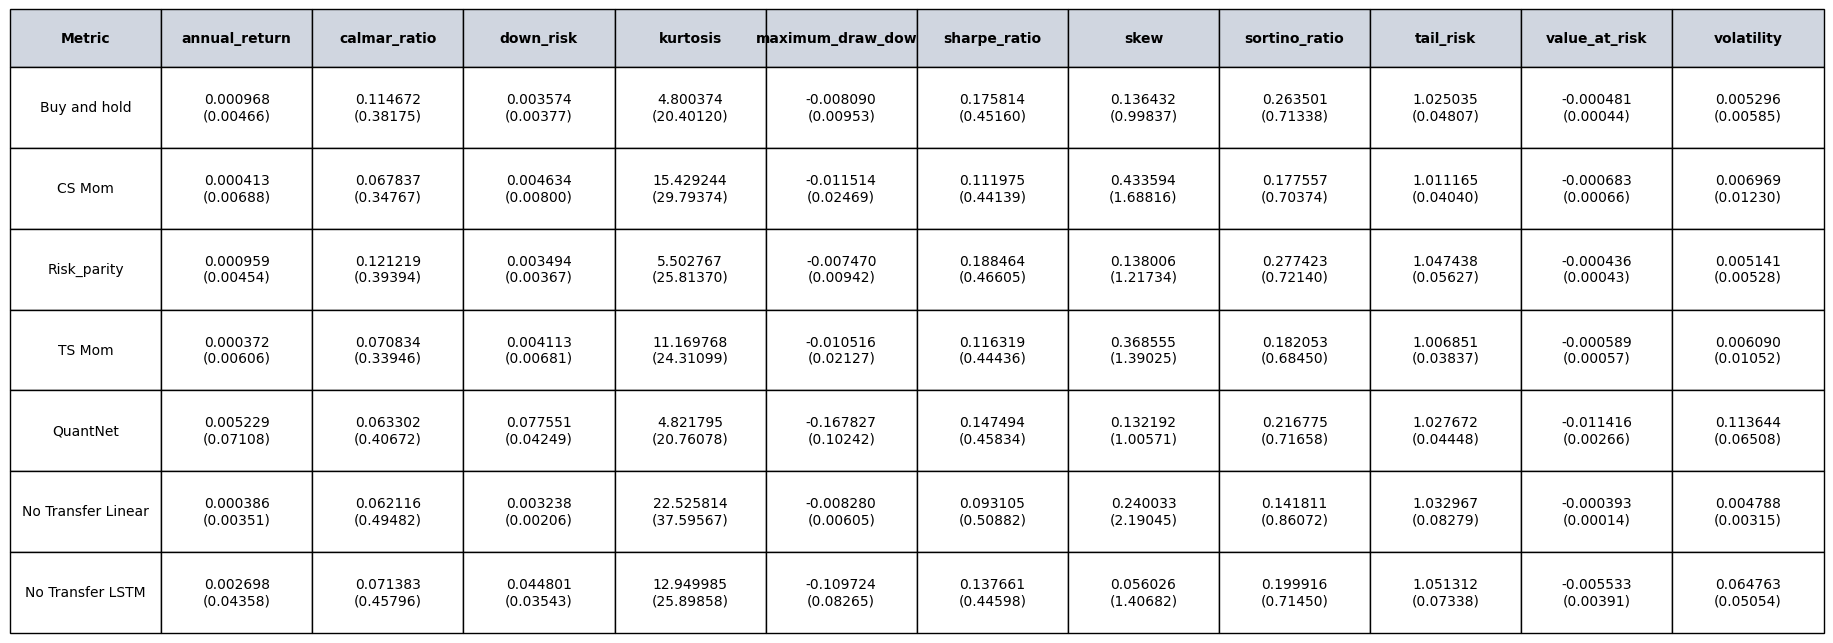

In [22]:
draw_table(df=table_1, upper_prefix="median", lower_prefix="mad")